# Tugas Mining
- Nama: Abdul Haris
- Kelas: BD-A

## News_Final

In [4]:
import numpy as np
import matplotlib.pyplot as plt

import pandas as pd
import scipy.stats as stats

#load News_Final data to pandas DataFrame
news = pd.read_excel('News_Final.xlsx', sheet_name='News_Final', encoding='utf8')

In [6]:
# print data news lima pertama
news.head(5)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1


In [7]:
print("Shape of raw news data:", news.shape[0], "rows")
print("Shape of raw news data:", news.shape[1], "columns")

Shape of raw news data: 93239 rows
Shape of raw news data: 11 columns


In [8]:
#cek missing values
news.isnull().sum()

IDLink                 0
Title                  0
Headline              16
Source               279
Topic                  0
PublishDate            0
SentimentTitle         0
SentimentHeadline      0
Facebook               0
GooglePlus             0
LinkedIn               0
dtype: int64

In [9]:
# drop yang mengandung NaN
clean_news = news.dropna()

In [10]:
#cek missing values again
clean_news.isnull().sum()

IDLink               0
Title                0
Headline             0
Source               0
Topic                0
PublishDate          0
SentimentTitle       0
SentimentHeadline    0
Facebook             0
GooglePlus           0
LinkedIn             0
dtype: int64

In [11]:
print("Shape of clean news data:", clean_news.shape[0], "rows")
print("Shape of clean news data:", clean_news.shape[1], "columns")

Shape of clean news data: 92944 rows
Shape of clean news data: 11 columns


In [12]:
clean_news.dtypes

IDLink                        int64
Title                        object
Headline                     object
Source                       object
Topic                        object
PublishDate          datetime64[ns]
SentimentTitle              float64
SentimentHeadline           float64
Facebook                      int64
GooglePlus                    int64
LinkedIn                      int64
dtype: object

In [13]:
clean_news.head(10)

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
0,99248,Obama Lays Wreath at Arlington National Cemetery,Obama Lays Wreath at Arlington National Cemete...,USA TODAY,obama,2002-04-02 00:00:00,0.000000,-0.053300,-1,-1,-1
1,10423,A Look at the Health of the Chinese Economy,"Tim Haywood, investment director business-unit...",Bloomberg,economy,2008-09-20 00:00:00,0.208333,-0.156386,-1,-1,-1
2,18828,Nouriel Roubini: Global Economy Not Back to 2008,"Nouriel Roubini, NYU professor and chairman at...",Bloomberg,economy,2012-01-28 00:00:00,-0.425210,0.139754,-1,-1,-1
3,27788,Finland GDP Expands In Q4,Finland's economy expanded marginally in the t...,RTT News,economy,2015-03-01 00:06:00,0.000000,0.026064,-1,-1,-1
4,27789,"Tourism, govt spending buoys Thai economy in J...",Tourism and public spending continued to boost...,The Nation - Thailand&#39;s English news,economy,2015-03-01 00:11:00,0.000000,0.141084,-1,-1,-1
5,27790,Intellitec Solutions to Host 13th Annual Sprin...,Over 100 attendees expected to see latest vers...,PRWeb,microsoft,2015-03-01 00:19:00,-0.075378,0.036773,-1,-1,-1
7,80762,"Obama, stars pay a musical tribute to Ray Charles",First lady Michelle Obama speaks in the State ...,Coast Reporter,obama,2015-03-01 00:45:00,0.083333,0.103003,-1,-1,-1
8,80771,Fire claims more than 100-year-old barn in Han...,A Hancock County man lost a barn early Monday ...,WTHR Indianapolis,palestine,2015-03-01 01:20:00,-0.173925,-0.050185,-1,-1,-1
9,27803,Microsoft's new Windows 10 ad targets Apple,"New Delhi, Feb.29 : Technology giant Microsoft...",New Kerala,microsoft,2015-03-01 01:32:00,-0.059536,-0.081715,-1,-1,-1
10,27813,Microsoft Project Centennial seen with â€œuniv...,"Microsoft may have burned off one bridge, but ...",SlashGear,microsoft,2015-03-01 02:14:00,0.000000,0.002550,-1,-1,-1


### Topics

In [14]:
clean_news.groupby('Topic').size()

Topic
economy      33888
microsoft    21851
obama        28598
palestine     8607
dtype: int64

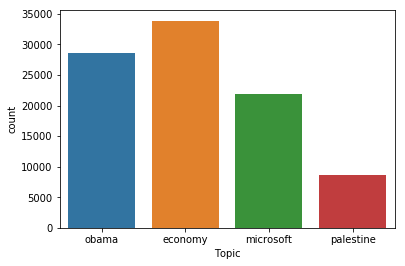

In [16]:
import seaborn as sns
sns.countplot(clean_news['Topic'],label="Count")
plt.show()

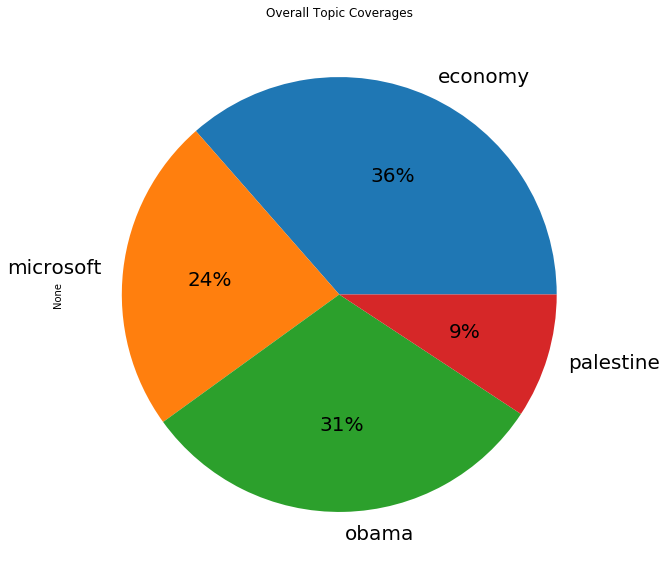

In [12]:
clean_news.groupby('Topic').size().plot.pie(figsize=(10,10), autopct='%1.0f%%', title="Overall Topic Coverages", fontsize=20)

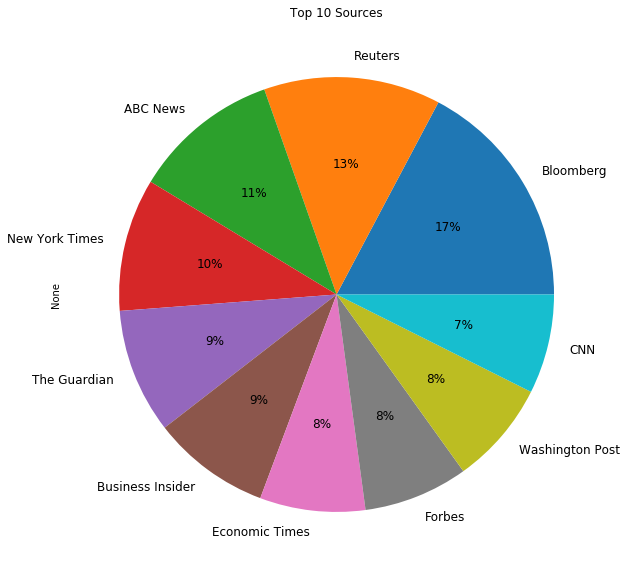

In [13]:
temp = clean_news.groupby('Source').size().sort_values(ascending=False)
temp2 = temp.head(10)
temp2.plot.pie(figsize=(10,10), autopct='%1.0f%%', title="Top 10 Sources", fontsize=12)

## Social Media

### Max Popularity

In [14]:
# Facebook
clean_news[clean_news.Facebook == clean_news.Facebook.max()]

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
44634,27780,Editorial: Welcome rain clouds issues for economy,"On the back of good grass growth, Dairy NZ rev...",New Zealand Herald,economy,2016-02-29 07:17:31,0.070868,0.18474,49211,0,0


In [15]:
# Google Plus
clean_news[clean_news.GooglePlus == clean_news.GooglePlus.max()]

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
36767,23117,"Under Sanders, income and jobs would soar, eco...",Those are just a few of the things that would ...,CNNMoney,economy,2016-02-08 17:40:27,-0.041667,0.069317,16993,1267,455


In [16]:
# LinkedIn
clean_news[clean_news.LinkedIn == clean_news.LinkedIn.max()]

,IDLink,Title,Headline,Source,Topic,PublishDate,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
84580,56180,"Microsoft to buy LinkedIn for $26.2B in cash, ...",Huge news today in the world of M&amp;A in ent...,TechCrunch,microsoft,2016-06-13 14:40:16,0.070665,0.07,-1,555,20341


### Statistics and Correlations

In [18]:
clean_news.describe()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
count,92944.000000,92944.000000,92944.000000,92944.000000,92944.000000,92944.000000
mean,51489.232495,-0.005326,-0.027493,113.499107,3.901166,16.601061
std,30391.144262,0.136502,0.142061,621.124070,18.520538,154.701097
min,1.000000,-0.950694,-0.755433,-1.000000,-1.000000,-1.000000
25%,24240.750000,-0.079057,-0.114598,0.000000,0.000000,0.000000
50%,52159.500000,0.000000,-0.026064,5.000000,0.000000,0.000000
75%,76489.250000,0.064906,0.059868,33.000000,2.000000,4.000000
max,104802.000000,0.962354,0.964646,49211.000000,1267.000000,20341.000000


In [17]:
clean_news.iloc[:,0:11].corr()

,IDLink,SentimentTitle,SentimentHeadline,Facebook,GooglePlus,LinkedIn
IDLink,1.000000,0.005785,0.024596,0.106386,0.038074,-0.032257
SentimentTitle,0.005785,1.000000,0.183690,-0.003927,-0.010411,0.003347
SentimentHeadline,0.024596,0.183690,1.000000,0.000457,0.001751,0.005928
Facebook,0.106386,-0.003927,0.000457,1.000000,0.508989,0.067854
GooglePlus,0.038074,-0.010411,0.001751,0.508989,1.000000,0.264683
LinkedIn,-0.032257,0.003347,0.005928,0.067854,0.264683,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A94EC3D9E8>,
      dtype=object)

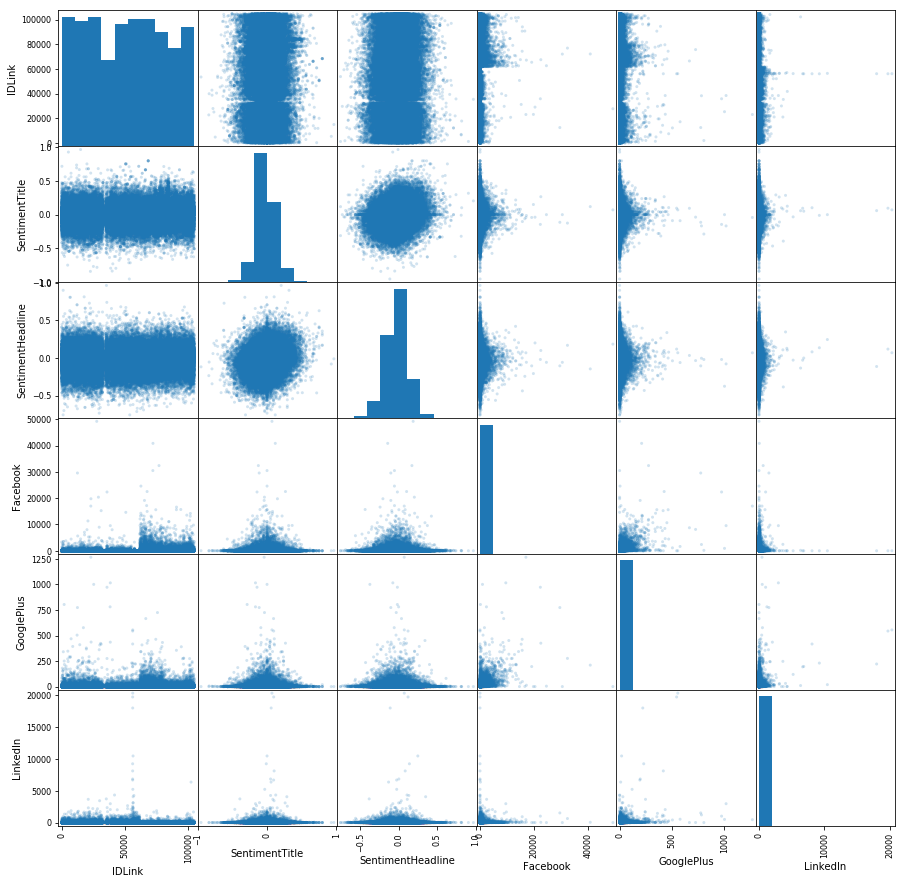

In [18]:
pd.plotting.scatter_matrix(clean_news, alpha=0.2, figsize=(15,15))

In [38]:
temp_news = clean_news.copy()
temp_news["Year"] = temp_news['PublishDate'].dt.year
temp_news["Month"] = temp_news['PublishDate'].dt.month
temp_news["Date"] = temp_news['PublishDate'].dt.date

In [21]:
yt = temp_news[["Year", "Topic"]]
pd.crosstab(yt.Year, yt.Topic)

Topic,economy,microsoft,obama,palestine
Year,,,,
2002,0,0,1,0
2008,1,0,0,0
2012,1,0,0,0
2015,7677,5132,5700,2021
2016,26209,16719,22897,6586


In [26]:
yt2015 = yt[yt['Year'] >= 2015]

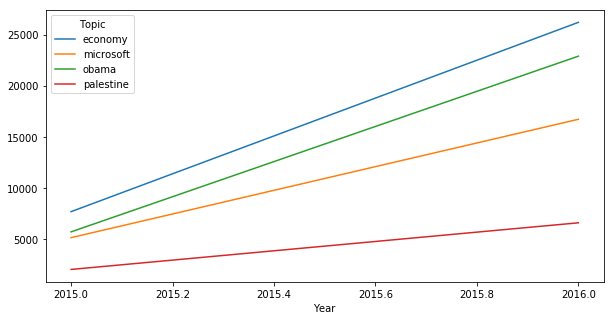

In [27]:
pd.crosstab(yt2015.Year, yt2015.Topic).plot.line(figsize=(10,5))

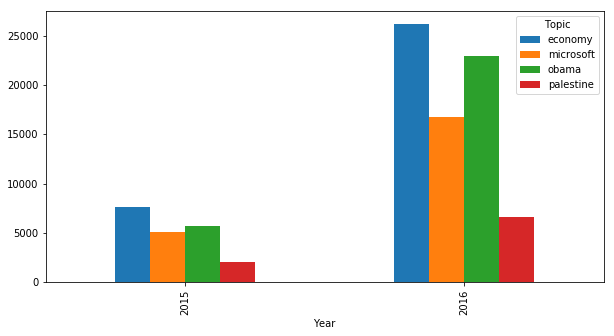

In [28]:
pd.crosstab(yt2015.Year, yt2015.Topic).plot.bar(figsize=(10,5))

In [30]:
pd.crosstab(yt.Topic, yt.Year)

Year,2002,2008,2012,2015,2016
Topic,,,,,
economy,0,1,1,7677,26209
microsoft,0,0,0,5132,16719
obama,1,0,0,5700,22897
palestine,0,0,0,2021,6586


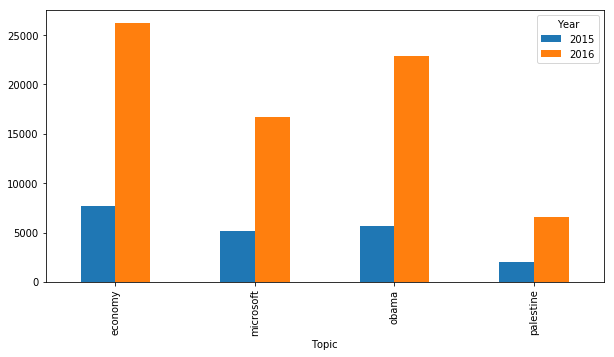

In [32]:
xtopic = yt2015.Topic
ytopic = yt2015.Year
pd.crosstab(xtopic, ytopic).plot.bar( figsize=(10,5))

In [49]:
test = temp_news[temp_news['PublishDate'] >= '2015-01-01']
pd.crosstab(test.Date, test.Topic)

Topic,economy,microsoft,obama,palestine
Date,,,,
2015-03-01,39,84,6,1
2015-06-11,0,1,0,0
2015-07-22,0,1,0,0
2015-08-27,0,1,0,0
2015-09-09,0,0,0,1
2015-09-10,0,0,0,1
2015-09-29,0,0,0,1
2015-10-09,0,1,0,0
2015-10-12,0,1,0,2


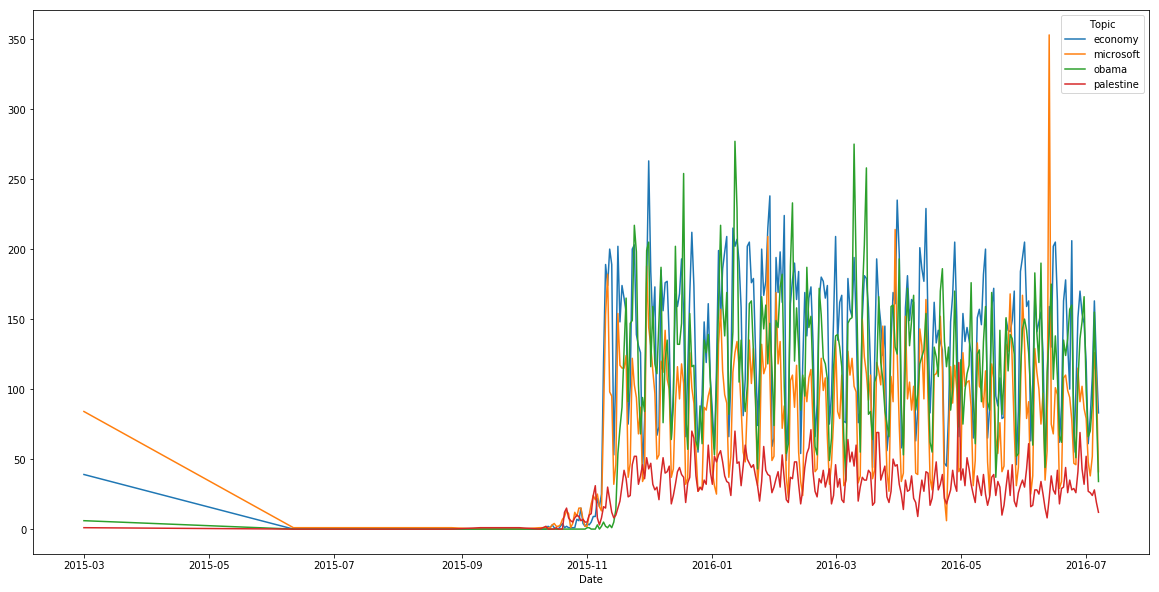

In [48]:
pd.crosstab(test.Date, test.Topic).plot.line(figsize=(20,10))